# Example notebook to plot IPF with strain or misOri values

This is a work in progress and currently only has basic IPF plotting

In [2]:
#Load packages
import numpy as np
import matplotlib.pyplot as plt

# if using copy in current directory
from quat import Quat
import ebsd

# if using installed copy
# from DataAnalysisUtilities.quat import Quat
# import DataAnalysisUtilities.ebsd as ebsd

#Set plot behaviour
%matplotlib osx

### Plot an IPF of a single orientation

Define Euler angles and convert to radians

In [4]:
angles = np.array([195, 45, 59], dtype=float)
angles *= np.pi / 180

Define plotting direction

In [5]:
direction = np.array([0, 0, 1])

Create a quaternion object to store the orientation

In [7]:
ori = Quat(angles[0], angles[1], angles[2])

and plot

In [8]:
Quat.plotIPF([ori], direction, "cubic")

Plotting is done by matplotlib's scatter command and any extra arguments given to Quat.plotIPF will be passed to scatter. See [here](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html) for all options.

In [9]:
Quat.plotIPF([ori], direction, "cubic", c="blue", s=100, marker="o")

### Plot multiple orientations

Create some more quaternions

In [16]:
angles = np.array([100, 70, 50], dtype=float)
angles *= np.pi / 180
ori2 = Quat(angles[0], angles[1], angles[2])

angles = np.array([20, 10, 150], dtype=float)
angles *= np.pi / 180
ori3 = Quat(angles[0], angles[2], angles[0])

The first argument of Quat.plotIPF is a list of quaternions, so plotting multiple is easy

In [17]:
Quat.plotIPF([ori, ori2, ori3], direction, "cubic")

Marker size and colour can be set per point

In [22]:
colourVals = [0.1, 0.5, 1]
sizeVals = [100, 200, 500]

Quat.plotIPF([ori, ori2, ori3], direction, "cubic", marker='o', s=sizeVals,
             c=colourVals, cmap="YlOrRd", vmin=0, vmax=1)

plt.colorbar();

### Plot orientations from an EBSD map

Load in an EBSD map, detect grains and then calculate each grains aveage orientaion

In [23]:
EbsdFilePath = "example_data/Map Data 2-DIC area"

EbsdMap = ebsd.Map(EbsdFilePath, "cubic")
EbsdMap.buildQuatArray()
EbsdMap.findBoundaries(boundDef = 10)
EbsdMap.findGrains(minGrainSize=10)
EbsdMap.calcGrainAvOris()

Select a grain

In [25]:
EbsdMap.locateGrainID()

Grain ID: 122


and then plot it's average orientaion (note the default direction here is (001) but we've specifically defined it here)

In [32]:
EbsdMap.grainList[EbsdMap.currGrainId].plotRefOri(direction=direction)

In [ ]:
# you could also do this for a HRDIC map that has been linked to an EBSD map
# HrdicMap.grainList[HrdicMap.currGrainId].ebsdGrain.plotRefOri()

or plot the orientation of every point in the grain

In [33]:
EbsdMap.grainList[EbsdMap.currGrainId].plotOriSpread(direction=direction)

Now we could loop over each grain in the map to create a list of all the orientaions and plot that

In [34]:
AverageOrientaions = []

for grain in EbsdMap.grainList:
    AverageOrientaions.append(grain.refOri)
    
Quat.plotIPF(AverageOrientaions, direction, EbsdMap.crystalSym)

## There's nothing below here worth looking at

In [26]:
import matplotlib.pyplot as plt
import numpy as np
#import Read_EBSD
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.mlab as mlab

import DataAnalysisUtilities.hrdic as hrdic

from DataAnalysisUtilities.quat import Quat

import DataAnalysisUtilities.ebsd as ebsd

import matplotlib.image as mpimg

In [3]:
%matplotlib osx

In [123]:
plotIPFAxis()

angles=[ 195.7,   45.3,   59.1 ]
# angles=[0, 0, 0]
angles=[241,27,18]

orientation = Quat(angles[0] * np.pi / 180, angles[1] * np.pi / 180, angles[2] * np.pi / 180)
directionSample = np.array((0, 0, 1))

symmetries = Quat.symEqv("hexagonal")

directionCrystal = np.zeros((len(symmetries), 3))
for i, symmetry in enumerate(symmetries):
    orientationSym = symmetry * orientation
    directionCrystal[i, :] = orientationSym.transformVector(directionSample)
    directionCrystal[i, :] = directionCrystal[i, :] / np.dot(directionCrystal[i, :],directionCrystal[i, :])

# move all vectors into north hemisphere
directionCrystal[directionCrystal[:, 2] < 0, :] *= -1

PFCoordsSph = np.zeros((len(symmetries), 2))
PFCoordsSph[:, 0] = np.arccos(directionCrystal[:, 2])  # alpha
PFCoordsSph[:, 1] = np.arctan2(directionCrystal[:, 1], directionCrystal[:, 0])  # beta

PFCoordsPjt = np.zeros((len(symmetries), 2))
PFCoordsPjt[:, 0] = np.tan(PFCoordsSph[:, 0]/2) * np.cos(PFCoordsSph[:, 1])
PFCoordsPjt[:, 1] = np.tan(PFCoordsSph[:, 0]/2) * np.sin(PFCoordsSph[:, 1])


trialPoles = np.logical_and(PFCoordsSph[:, 1] >= 0, PFCoordsSph[:, 1] <= np.pi/4)
trialPoleIdxs = np.arange(len(trialPoles))[trialPoles]

poleIdx = trialPoleIdxs[np.argmin(PFCoordsSph[trialPoles, 0])]

# plt.plot(PFCoordsPjt[poleIdx, 0], PFCoordsPjt[poleIdx, 1], 'r+')
plt.plot(PFCoordsPjt[:, 0], PFCoordsPjt[:, 1], 'r+')


In [114]:
def stereoProject(x, y, z):
    mod = np.sqrt(x**2 + y**2 + z**2)
    x = x / mod
    y = y / mod
    z = z / mod
    
    alpha = np.arccos(z)
    beta = np.arctan2(y, x)
    
    xp = np.tan(alpha/2) * np.sin(beta)
    yp = -np.tan(alpha/2) * np.cos(beta)
    
    return xp, yp

In [118]:
def plotIPFAxis():
    res = 100
    s = np.linspace(0, 1, res)
    t = np.linspace(0, -1, res)
    
    xp, yp = stereoProject(t, s, np.ones(res))
    plt.plot(xp, yp, 'k', lw=2)
    plt.text(xp[0], yp[0]-0.005, '001', va='top', ha='center')
    
    xp, yp = stereoProject(np.zeros(res), s, np.ones(res))
    plt.plot(xp, yp, 'k', lw=2)
    plt.text(xp[res-1], yp[res-1]-0.005, '011', va='top', ha='center')
    
    xp, yp = stereoProject(t, np.ones(res), np.ones(res))
    plt.plot(xp, yp, 'k', lw=2)
    plt.text(xp[res-1], yp[res-1]+0.005, '-111', va='bottom', ha='center')

    plt.axis('equal')
    plt.axis('off')

In [116]:
def plotIPFAxisHex():
    res = 100
    s = np.linspace(0, 1, res)
    t = np.linspace(0, -1, res)
    
    xp, yp = stereoProject(s, np.zeros(res), s[::-1])
    plt.plot(xp, yp, 'k', lw=2)
#     plt.text(xp[0], yp[0]-0.005, '001', va='top', ha='center')
    
    xp, yp = stereoProject(2 * s, s, s[::-1])
    plt.plot(xp, yp, 'k', lw=2)
#     plt.text(xp[res-1], yp[res-1]-0.005, '011', va='top', ha='center')
    
#     xp, yp = stereoProject(t, np.ones(res), np.ones(res))
#     plt.plot(xp, yp, 'k', lw=2)
#     plt.text(xp[res-1], yp[res-1]+0.005, '-111', va='bottom', ha='center')

    plt.axis('equal')
    plt.axis('off')
    
plotIPFAxisHex()

In [123]:
s = np.linspace(0, 1, 100)
t = np.linspace(0, -1, 100)

xp, yp = stereoProject(t, s, np.ones(100))
plt.plot(xp, yp)
xp, yp = stereoProject(np.zeros(100), s, np.ones(100))
plt.plot(xp, yp)
xp, yp = stereoProject(t, np.ones(100), np.ones(100))
plt.plot(xp, yp)

xp, yp = stereoProject(t, np.ones(100), s)
plt.plot(xp, yp)
xp, yp = stereoProject(np.zeros(100), np.ones(100), s)
plt.plot(xp, yp)

xp, yp = stereoProject(-np.ones(100), np.ones(100), s)
plt.plot(xp, yp)
xp, yp = stereoProject(t, np.ones(100), np.zeros(100))
plt.plot(xp, yp)


xp, yp = stereoProject(t, np.zeros(100), np.ones(100))
plt.plot(xp, yp)
xp, yp = stereoProject(-np.ones(100), s, np.ones(100))
plt.plot(xp, yp)

xp, yp = stereoProject(-np.ones(100), np.zeros(100), s)
plt.plot(xp, yp)
xp, yp = stereoProject(-np.ones(100), s, s)
plt.plot(xp, yp)

xp, yp = stereoProject(-np.ones(100), s, np.zeros(100))
plt.plot(xp, yp)


xp, yp = stereoProject(t, t, np.ones(100))
plt.plot(xp, yp)
xp, yp = stereoProject(-np.ones(100), t, np.ones(100))
plt.plot(xp, yp)

xp, yp = stereoProject(-np.ones(100), t, s)
plt.plot(xp, yp)

xp, yp = stereoProject(-np.ones(100), -np.ones(100), s)
plt.plot(xp, yp)
xp, yp = stereoProject(-np.ones(100), t, np.zeros(100))
plt.plot(xp, yp)


xp, yp = stereoProject(np.zeros(100), t, np.ones(100))
plt.plot(xp, yp)
xp, yp = stereoProject(t, -np.ones(100), np.ones(100))
plt.plot(xp, yp)

xp, yp = stereoProject(np.zeros(100), -np.ones(100), s)
plt.plot(xp, yp)
xp, yp = stereoProject(t, -np.ones(100), s)
plt.plot(xp, yp)

xp, yp = stereoProject(t, -np.ones(100), np.zeros(100))
plt.plot(xp, yp)



plt.axis('equal')
plt.show()

In [23]:
def plot_IPFZ(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0],euler_angles[1],euler_angles[2]
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GZ(angles,rotations)[0][0]),cy_list.append(plot_pole_GZ(angles,rotations)[0][1])
    return cx_list,cy_list

In [24]:
def plot_IPFX(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0],euler_angles[1],euler_angles[2]
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GX(angles,rotations)[0][0]),cy_list.append(plot_pole_GX(angles,rotations)[0][1])
    return cx_list,cy_list

In [25]:
def plot_IPFY(euler_angles):
    phi1_list,P_list,p2_list=euler_angles[0],euler_angles[1],euler_angles[2]
    
    cx_list,cy_list=[],[]
    for p1,P,p2 in zip(phi1_list,P_list,p2_list):
        angles=[p1,P,p2]
        if sum(angles)>0:
            cx_list.append(plot_pole_GY(angles,rotations)[0][0]),cy_list.append(plot_pole_GY(angles,rotations)[0][1])
    return cx_list,cy_list

## Load the data and define variables

In [26]:
phi1s = np.loadtxt("./example_data_AH/ipf/newMap_grainMeanPhi1.txt")
phis = np.loadtxt("./example_data_AH/ipf/newMap_grainMeanPhi.txt")
phi2s = np.loadtxt("./example_data_AH/ipf/newMap_grainMeanPhi2.txt")

In [27]:
maxSSs = np.loadtxt("./example_data_AH/ipf/newMap_grainMaxSSMeans.txt")
misOris = np.loadtxt("./example_data_AH/ipf/newMap_grainMeanMisOris.txt")

In [28]:
euler_angles = [phi1s,phis,phi2s]

In [29]:
np.shape(euler_angles)

(3, 167)

## Plot the IPF Z

In [30]:
x_co,y_co=plot_IPFZ(euler_angles);

In [31]:
strainVals = maxSSs
misOriVals = misOris
randomVals = np.random.rand(len(x_co))

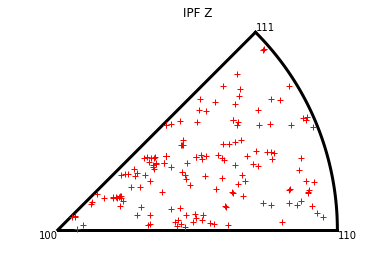

In [32]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'r+')
plt.title('IPF Z')

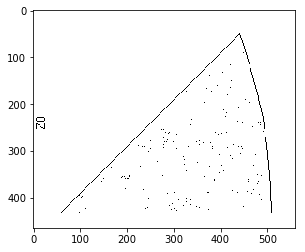

In [33]:
# load the IPFZ image from channel5 - see that it is the same
img=mpimg.imread("./example_data_AH/ipf/ipfZChannel5.png")
imgplot = plt.imshow(img)
plt.show()

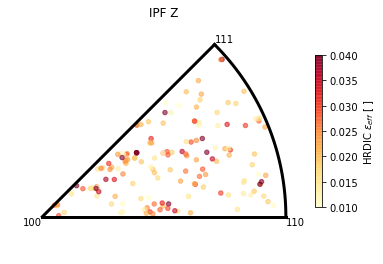

In [34]:
f=plt.figure()
xi,yi=IPF_axis_cubic(100)
strain_points=plt.scatter(x_co, y_co, marker='.', s=80, c=strainVals, cmap="YlOrRd",vmin=0.01,vmax=0.04,alpha=0.6)
plt.colorbar(strain_points, label="HRDIC $\epsilon_{eff}$ [ ]",shrink=0.7)
plt.title("IPF Z")
plt.show()

## Plot the IPF X

In [35]:
x_co,y_co=plot_IPFX(euler_angles);

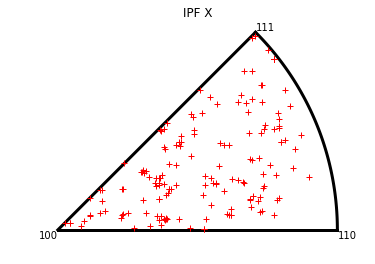

In [36]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'r+')
plt.title('IPF X')

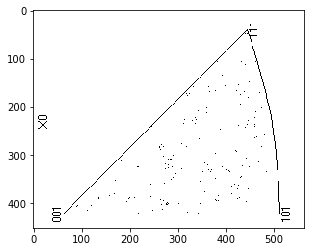

In [37]:
# load the IPFZ image from channel5 - see that it is the same
img=mpimg.imread("./example_data_AH/ipf/ipfXChannel5.png")
imgplot = plt.imshow(img)
plt.show()

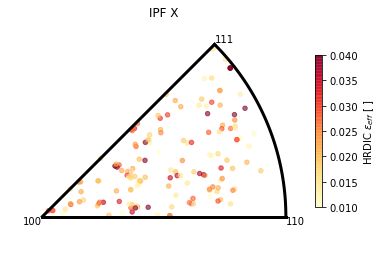

In [38]:
f=plt.figure()
xi,yi=IPF_axis_cubic(100)
strain_points=plt.scatter(x_co, y_co, marker='.', s=80,c=strainVals, cmap="YlOrRd",vmin=0.01, vmax=0.04, alpha=0.6)
plt.colorbar(strain_points, label="HRDIC $\epsilon_{eff}$ [ ]",shrink=0.7)
plt.title("IPF X")
plt.show()

## Plot the IPF Y

In [39]:
x_co,y_co=plot_IPFY(euler_angles);

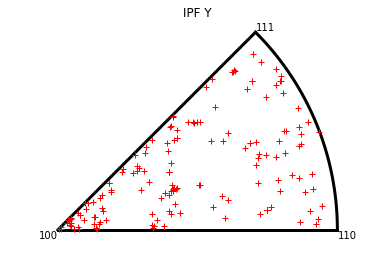

In [40]:
xi,yi=IPF_axis_cubic(100)
plt.plot(x_co,y_co,'r+')
plt.title('IPF Y')

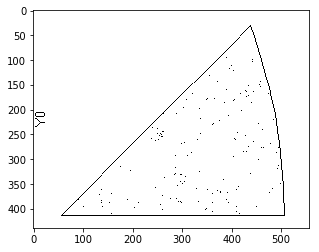

In [41]:
# load the IPFZ image from channel5 - see that it is NOT the same
img=mpimg.imread("./example_data_AH/ipf/ipfYChannel5.png")
imgplot = plt.imshow(img)
plt.show()

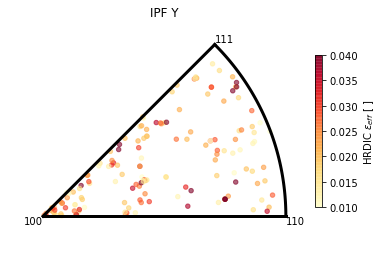

In [42]:
f=plt.figure()
xi,yi=IPF_axis_cubic(100)
strain_points=plt.scatter(x_co, y_co, marker='o', s=20, c=strainVals, cmap="YlOrRd", vmin=0.01,vmax=0.04, alpha = 0.6)
plt.colorbar(strain_points, label="HRDIC $\epsilon_{eff}$ [ ]",shrink=0.7)
plt.title("IPF Y")
plt.show()

In [ ]:
# To Do
# - get IPFY to match channel 5
# - contouring with respect to number density of data points (texture)
# - contouring with respect to strain or misOri values